In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Reading in the data file

In [3]:
housing0 = pd.read_csv("Housing.csv")

In [4]:
housing0.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


### Univariate analysis

In [6]:
housing0.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
housing0.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [8]:
housing0.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

### Bi-variate analysis

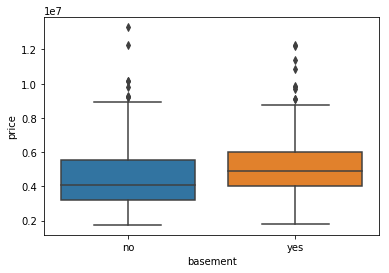

In [9]:
sns.boxplot('basement', 'price', data=housing0)

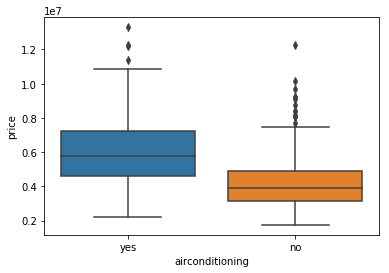

In [10]:
sns.boxplot('airconditioning', 'price', data=housing0)

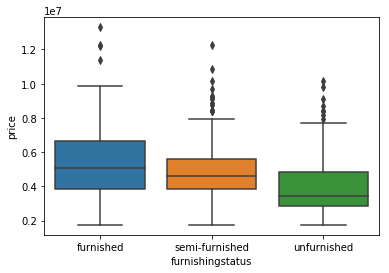

In [11]:
sns.boxplot('furnishingstatus', 'price', data=housing0)

#### Price vs Area

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


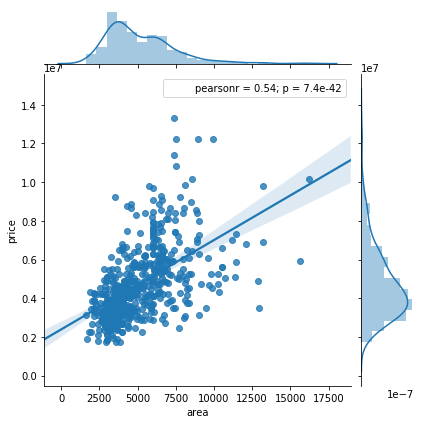

In [12]:
sns.jointplot('area', 'price', data = housing0, kind="reg")

## Data pre-processing

 - Handle null values (not needed here)
 - Handle outliers (not needed here)
 - Encoding for categorical variables

##### Making a copy of the dataframe

In [13]:
housing1 = housing0.copy()

Dummy coding for categorical values

In [14]:
housing0.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [15]:
#Defining a map function - that maps 'Yes' to 1 and 'No' to 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

List of column to get indicator variabes for (columns with yes/no)

In [16]:
cols_yn = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

Applying the manual_map function to these columns

In [17]:
housing1[cols_yn] = housing1[cols_yn].apply(binary_map)

In [18]:
housing1[cols_yn].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


Dummy encoding for the furnishing status variable

In [19]:
housing1.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [20]:
housing1 = pd.get_dummies(housing1, columns=['furnishingstatus'], drop_first=True)

In [21]:
housing1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [22]:
housing1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


##### MinMax scaling - task 

## Model building

#### train test split

In [23]:
X = housing1.drop("price", axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [24]:
y = housing1[['price']]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [75]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
X_train.shape, X_test.shape

((436, 13), (109, 13))

#### Training the first model

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr1 = LinearRegression()

In [82]:
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [83]:
lr1.coef_

array([[ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,
         4.07476595e+05,  3.67919948e+05,  2.31610037e+05,
         3.90251176e+05,  6.84649885e+05,  7.91426736e+05,
         2.24841913e+05,  6.29890565e+05, -1.26881818e+05,
        -4.13645062e+05]])

In [85]:
from sklearn.metrics import r2_score

In [86]:
y_train_pred = lr1.predict(X_train)

In [87]:
r2_score(y_train, y_train_pred)

0.6859438988560158

### Multi-collinearity
 - when predictors are associated with each other

#### Correlation heatmap

In [89]:
corrs = X_train.corr()

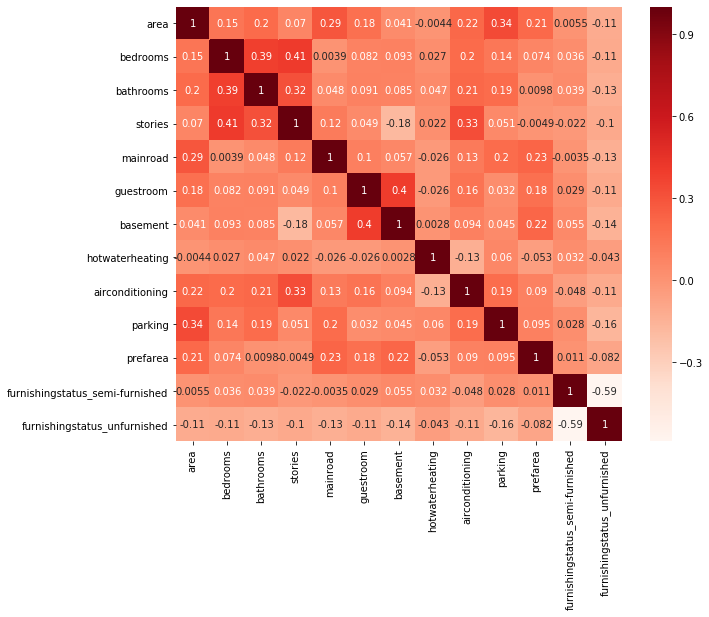

In [94]:
plt.figure(figsize=[10,8])
sns.heatmap(corrs, cmap="Reds", annot=True)

## Recursive feature elimination
 - method to automatically select top k features
 - k has to be provided by the user 

In [95]:
from sklearn.feature_selection import RFE

In [98]:
?RFE

In [97]:
lr2 = LinearRegression()

In [139]:
rfe_selector = RFE(lr2, 10, verbose=True)

#### Fitting on the train set

In [140]:
rfe_selector.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=True)

In [141]:
rfe_selector.support_

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True])

In [142]:
rfe_selector.ranking_

array([4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [143]:
cols_keep = X_train.columns[rfe_selector.support_]

In [144]:
cols_keep

Index(['bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [145]:
lr2 = LinearRegression()

In [146]:
lr2.fit(X_train[cols_keep],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
y_train_pred = lr2.predict(X_train[cols_keep])

Getting R2

In [148]:
r2_score(y_train, y_train_pred)

0.6157315509474524